In [1]:
# two

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 50,
        x_rate = [0.5, 1.0],
        m_rate = [0.5, 1.0],
        weight_constraint = [-3.,3.],
        radioactive_rating = [0.1, 0.5],
        grow_factor = [0.1, 0.5],
        scale_hyperparameter = False,
        regularizer = l2_regularizer))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    itr = century + breakpoint
    '''
    model.optimizer.rr = model.optimizer.rr * 0.9
    model.optimizer.gf = model.optimizer.gf * 0.9
    model.optimizer.crossover_rate = model.optimizer.crossover_rate * 0.9
    model.optimizer.mutation_rate = model.optimizer.mutation_rate * 1.1
    '''
    model.optimizer.rr = model.optimizer.radioactive_rating[1] - (model.optimizer.radioactive_rating[1] - model.optimizer.radioactive_rating[0]) / EPOCHS * (EPOCHS - itr)
    model.optimizer.gf = model.optimizer.grow_factor[1] - (model.optimizer.grow_factor[1] - model.optimizer.grow_factor[0]) / EPOCHS * (EPOCHS - itr)
    model.optimizer.crossover_rate = model.optimizer.x_rate[1] - (model.optimizer.x_rate[1] - model.optimizer.x_rate[0]) / EPOCHS * (EPOCHS - itr)
    model.optimizer.mutation_rate = model.optimizer.m_rate[0] + (model.optimizer.m_rate[1] - model.optimizer.m_rate[0]) / EPOCHS * (EPOCHS - itr)
    

C:\Users\tcumi\Anaconda3\envs\py_3_6\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)
C:\Users\tcumi\Anaconda3\envs\py_3_6\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=Fal

Checkpoint 100, Accuracy: 0.9259259259259259, Loss: 0.3467540034541377
Checkpoint 200, Accuracy: 0.9506172839506173, Loss: 0.35741011301676434
Checkpoint 300, Accuracy: 0.9506172839506173, Loss: 0.35106609485767504
Checkpoint 400, Accuracy: 0.9444444444444444, Loss: 0.35512507403338395
Checkpoint 500, Accuracy: 0.9382716049382716, Loss: 0.3524825484664352


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.7841811  0.10126078 0.11455811]
[0. 0. 1.] <-> [0.3820137  0.01861324 0.5993731 ]
[1. 0. 0.] <-> [0.78731084 0.08879177 0.12389738]
[0. 1. 0.] <-> [0.31564066 0.66357094 0.02078843]
[1. 0. 0.] <-> [0.7960988  0.05847144 0.14542972]
[1. 0. 0.] <-> [0.75728333 0.12196565 0.12075099]
[1. 0. 0.] <-> [0.77280825 0.08374157 0.14345022]
[0. 0. 1.] <-> [0.19789577 0.02936947 0.7727348 ]
[0. 1. 0.] <-> [0.19626462 0.7915147  0.01222065]
[0. 0. 1.] <-> [0.1717816  0.02867215 0.79954624]
[1. 0. 0.] <-> [0.7500013  0.11462697 0.13537167]
[0. 1. 0.] <-> [0.27014875 0.7131446  0.01670664]
[1. 0. 0.] <-> [0.8072575  0.04276056 0.14998198]
[1. 0. 0.] <-> [0.7980711  0.07358478 0.1283442 ]
[1. 0. 0.] <-> [0.79180866 0.13582    0.07237137]
[1. 0. 0.] <-> [0.8104746  0.09053577 0.0989897 ]
[1. 0. 0.] <-> [0.69659275 0.03791356 0.26549366]
[0. 1. 0.] <-> [0.4930895  0.46842963 0.03848087]
[1. 0. 0.] <-> [0.7572227  0.16505392 0.07772339]
[1. 0. 0.] <-> [0.79906696 0.09386463 0.10706845]


In [12]:
# Testing Performance

C:\Users\tcumi\Anaconda3\envs\py_3_6\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


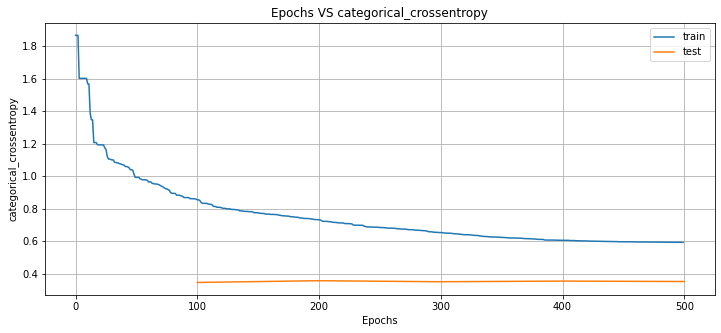

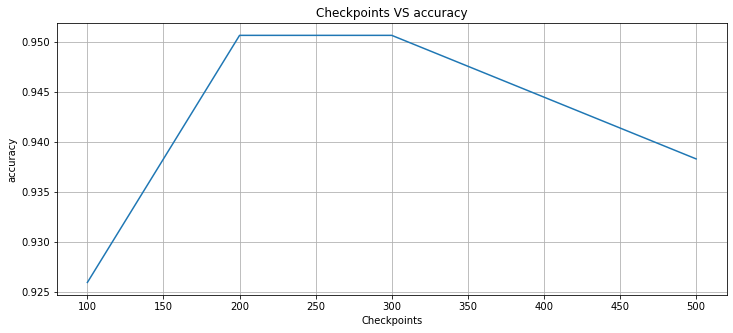

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9259259259259259, 'mean_square_error': 0.17917105689278703, 'categorical_crossentropy': 0.3467540034541377, 'precision': 0.8888888888888888, 'recall': 0.8888888888888888, 'f1': 0.8888888888888888, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 12, 'tn_hit': 16, 'fn_hit': 0}, 1: {'tp_hit': 9, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 6}, 2: {'tp_hit': 7, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 6}}, 'checkpoint': 100} 


{'accuracy': 0.9506172839506173, 'mean_square_error': 0.17448438170469494, 'categorical_crossentropy': 0.35741011301676434, 'precision': 0.9259259259259259, 'recall': 0.9259259259259259, 'f1': 0.9259259259259259, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 8, 'tn_hit': 20, 'fn_hit': 0}, 1: {'tp_hit': 11, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 4}, 2: {'tp_hit': 9, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 4}}, 'checkpoint': 200} 


{'accuracy': 0.9506172839506173, 'mean_square_error': 0.16977940218161341, 'categorical_crossentropy': 0.35106609485767504, 'precisio

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[-0.5341951   1.0500331   0.5171514   0.01994628 -0.3280703 ]
 bias: -0.4265032112598419

Neuron 1: weights:
[-0.3365585   0.66748357  0.20475481 -0.6995818  -0.88931906]
 bias: 0.594419538974762

Neuron 2: weights:
[ 0.33362257 -0.7409334  -0.3972101   0.38601133  0.6101894 ]
 bias: -0.1229071095585823

Neuron 3: weights:
[ 0.26711062 -0.8489632  -0.5638272  -0.763937   -0.37701154]
 bias: 0.34019187092781067

$
Layer 2
Neuron 0: weights:
[-0.6645474   0.7892481  -0.14832105  1.251684  ]
 bias: -0.08327119052410126

Neuron 1: weights:
[ 1.4561318  0.6678272 -1.3396089 -1.3060473]
 bias: -0.44741830229759216

Neuron 2: weights:
[-1.0991795  -1.5815469   1.5402131  -0.22470061]
 bias: -0.07522206753492355

$

